In [186]:
# imports
import pandas as pd
import numpy as np
from datetime import datetime

from pandas import DataFrame

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, LSTM, SimpleRNN, GRU, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler


In [187]:
# Constants
WINDOW_SIZE = 20

MODEL_NAME = 'model.keras'

LSTM_SAVE_PATH = f'model_lstm/{MODEL_NAME}'
RNN_SAVE_PATH = f'model_rnn/{MODEL_NAME}'
GRU_SAVE_PATH = f'model_gru/{MODEL_NAME}'
BI_RNN_SAVE_PATH = f'model_birnn/{MODEL_NAME}'

array([[1.        ],
       [1.00619864],
       [1.01239663],
       ...,
       [1.47057728],
       [1.4727554 ],
       [1.47493808]])

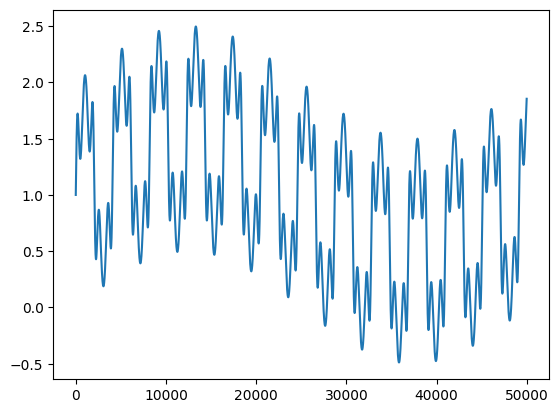

In [188]:
# Load generated data
data_file_path = "out.csv"

data_frame = pd.read_csv(data_file_path, header=None)
data_frame[0][:50000].plot()
data_frame.to_numpy()

In [189]:
# data processing
# [[[1], [2], [3], [4], [5]]] -> [6]
# [[[2], [3], [4], [5], [6]]] -> [7]

# scaler = MinMaxScaler(feature_range = (0, 1))
# scaled_df = pd.DataFrame(scaler.fit_transform(data_frame)) 

def create_data_set(df: DataFrame, window_size: int):
    df_as_np = df.to_numpy().flatten()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + window_size]]
        label = df_as_np[i + window_size]
        X.append(row)
        y.append(label)
    return np.array(X), np.array(y)

# scaled_df

X, y = create_data_set(data_frame, WINDOW_SIZE)

X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:75000], y[60000:75000]
X_test, y_test = X[75000:], y[75000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 20, 1), (60000,), (15000, 20, 1), (15000,), (24980, 20, 1), (24980,))

In [190]:
# Create models

#LSTM

model_lstm = Sequential()

model_lstm.add(InputLayer((WINDOW_SIZE, 1)))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dropout(0.05))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.05))
model_lstm.add(Dense(16, 'relu'))
model_lstm.add(Dense(1, 'linear'))

model_lstm.summary()

lstm_cp = ModelCheckpoint(LSTM_SAVE_PATH, save_best_only=True)

#RNN

model_rnn = Sequential()

model_rnn.add(InputLayer((WINDOW_SIZE, 1)))
model_rnn.add(SimpleRNN(64, return_sequences=True))
model_rnn.add(Dropout(0.05))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.05))
model_rnn.add(Dense(16, 'relu'))
model_rnn.add(Dense(1, 'linear'))

model_rnn.summary()

rnn_cp = ModelCheckpoint(RNN_SAVE_PATH, save_best_only=True)

#GRU

model_gru = Sequential()

model_gru.add(InputLayer((WINDOW_SIZE, 1)))
model_gru.add(GRU(64, return_sequences=True))
model_gru.add(Dropout(0.05))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.05))
model_gru.add(Dense(16, 'relu'))
model_gru.add(Dense(1, 'linear'))

model_gru.summary()

gru_cp = ModelCheckpoint(GRU_SAVE_PATH, save_best_only=True)

#BiRNN

model_birnn = Sequential()

model_birnn.add(InputLayer((WINDOW_SIZE, 1)))
model_birnn.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
model_birnn.add(Dropout(0.05))
model_birnn.add(Bidirectional(SimpleRNN(32)))
model_birnn.add(Dropout(0.05))
model_birnn.add(Dense(16, 'relu'))
model_birnn.add(Dense(1, 'linear'))

model_birnn.summary()

birnn_cp = ModelCheckpoint(BI_RNN_SAVE_PATH, save_best_only=True)


# Compile models

model_lstm.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model_rnn.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model_gru.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model_birnn.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_44 (SimpleRNN)       │ (None, 20, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_45 (SimpleRNN)       │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,873 (30.75 KB)

 Trainable params: 7,873 (30.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_22 (GRU)                    │ (None, 20, 64)         │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_23 (GRU)                    │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,817 (89.13 KB)

 Trainable params: 22,817 (89.13 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_22                │ (None, 20, 128)        │         8,448 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_23                │ (None, 64)             │        10,304 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,809 (77.38 KB)

 Trainable params: 19,809 (77.38 KB)

 Non-trainable params: 0 (0.00 B)

In [191]:
# Fit models
time_checkpoint = datetime.now()
model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[lstm_cp])
lstm_fit_time = datetime.now() - time_checkpoint

time_checkpoint = datetime.now()
model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[rnn_cp])
rnn_fit_time = datetime.now() - time_checkpoint

time_checkpoint = datetime.now()
model_gru.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[gru_cp])
gru_fit_time = datetime.now() - time_checkpoint

time_checkpoint = datetime.now()
model_birnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[birnn_cp])
birnn_fit_time = datetime.now() - time_checkpoint

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.1467 - root_mean_squared_error: 0.3346 - val_loss: 7.5964e-04 - val_root_mean_squared_error: 0.0276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.0045 - root_mean_squared_error: 0.0670 - val_loss: 4.6517e-04 - val_root_mean_squared_error: 0.0216
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.0031 - root_mean_squared_error: 0.0553 - val_loss: 9.0609e-04 - val_root_mean_squared_error: 0.0301
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0641 - root_mean_squared_error: 0.2316 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0372
Epoch 2/5
1875/1875 ━━━━━━━

In [192]:
model_lstm = load_model(LSTM_SAVE_PATH)
model_rnn = load_model(RNN_SAVE_PATH)
model_gru = load_model(GRU_SAVE_PATH)
model_birnn = load_model(BI_RNN_SAVE_PATH)

lstm_train_predictions = model_lstm.predict(X_train).flatten()
rnn_train_predictions = model_rnn.predict(X_train).flatten()
gru_train_predictions = model_gru.predict(X_train).flatten()
birnn_train_predictions = model_birnn.predict(X_train).flatten()

train_results = pd.DataFrame(
    data={
        'Predictions (LSTM)': lstm_train_predictions,
        'Predictions (RNN)': rnn_train_predictions,
        'Predictions (GRU)': gru_train_predictions,
        'Predictions (BiRNN)': birnn_train_predictions, 
        'Actual': y_train
    }
)

train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


,Predictions (LSTM),Predictions (RNN),Predictions (GRU),Predictions (BiRNN),Actual
0,1.060373,1.121056,1.078208,1.048997,1.123129
1,1.066559,1.126817,1.084281,1.055689,1.129197
2,1.072741,1.132558,1.090345,1.062361,1.135252
3,1.078917,1.138280,1.096399,1.069013,1.141294
4,1.085087,1.143983,1.102443,1.075645,1.147322
...,...,...,...,...,...
59995,1.074400,1.060478,1.060651,1.049273,1.071332
59996,1.072729,1.058714,1.058952,1.047480,1.069592
59997,1.071048,1.056938,1.057244,1.045676,1.067841
59998,1.069357,1.055152,1.055526,1.043860,1.066081


In [193]:
def draw_predictions(start: int, end: int, results: pd.DataFrame):
    _, axs = plt.subplots(1, 4, figsize=(24, 4)) 

    START, END = start, end

    axs[0].set_title('LSTM')
    axs[0].plot(results['Predictions (LSTM)'][START:END], label='Predictions')
    axs[0].plot(results['Actual'][START:END], label='Actual')
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title('RNN')
    axs[1].plot(results['Predictions (RNN)'][START:END], label='Predictions')
    axs[1].plot(results['Actual'][START:END], label='Actual')
    axs[1].legend()
    axs[1].grid()

    axs[2].set_title('GRU')
    axs[2].plot(results['Predictions (GRU)'][START:END], label='Predictions')
    axs[2].plot(results['Actual'][START:END], label='Actual')
    axs[2].legend()
    axs[2].grid()

    axs[3].set_title('BiRNN')
    axs[3].plot(results['Predictions (BiRNN)'][START:END], label='Predictions')
    axs[3].plot(results['Actual'][START:END], label='Actual')
    axs[3].legend()
    axs[3].grid()

    plt.show()    

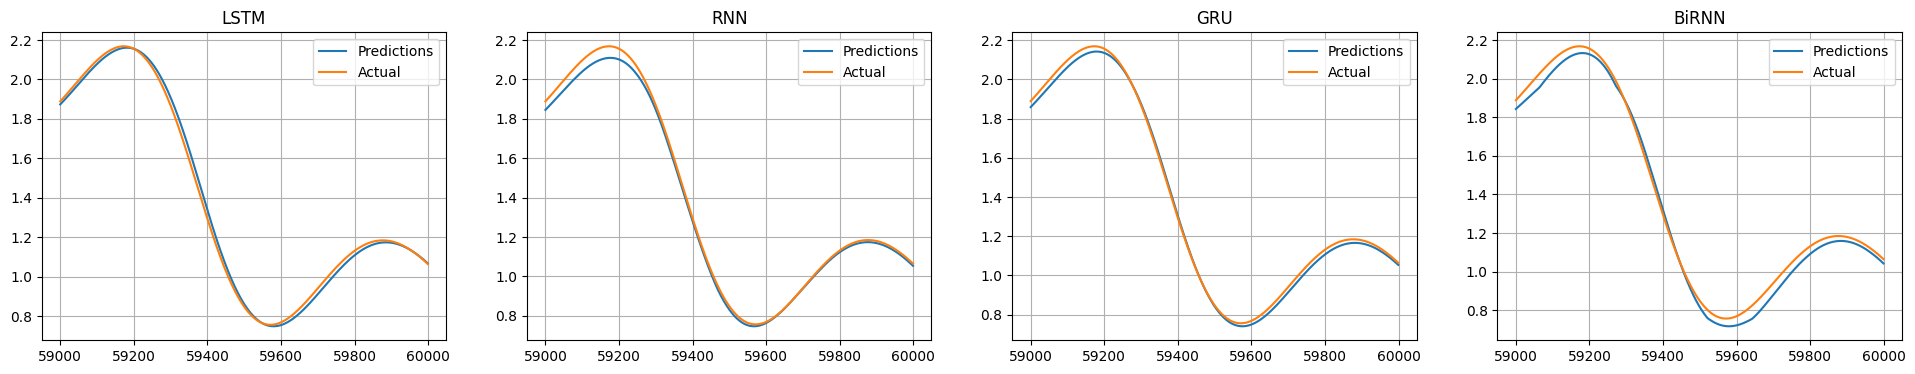

In [194]:
draw_predictions(59000, 60000, train_results)

In [195]:
time_checkpoint = datetime.now()
lstm_test_predictions = model_lstm.predict(X_test).flatten()
lstm_prediction_time = datetime.now() - time_checkpoint

time_checkpoint = datetime.now()
rnn_test_predictions = model_rnn.predict(X_test).flatten()
rnn_prediction_time = datetime.now() - time_checkpoint

time_checkpoint = datetime.now()
gru_test_predictions = model_gru.predict(X_test).flatten()
gru_prediction_time = datetime.now() - time_checkpoint

time_checkpoint = datetime.now()
birnn_test_predictions = model_birnn.predict(X_test).flatten()
birnn_prediction_time = datetime.now() - time_checkpoint

test_results = pd.DataFrame(
    data={
        'Predictions (LSTM)': lstm_test_predictions,
        'Predictions (RNN)': rnn_test_predictions,
        'Predictions (GRU)': gru_test_predictions,
        'Predictions (BiRNN)': birnn_test_predictions, 
        'Actual': y_test
    }
)
test_results 

781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
781/781 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


,Predictions (LSTM),Predictions (RNN),Predictions (GRU),Predictions (BiRNN),Actual
0,1.701173,1.652269,1.675325,1.683874,1.680716
1,1.698988,1.650133,1.673148,1.681766,1.678522
2,1.696800,1.647996,1.670966,1.679651,1.676324
3,1.694607,1.645854,1.668782,1.677531,1.674123
4,1.692410,1.643710,1.666593,1.675404,1.671919
...,...,...,...,...,...
24975,1.444962,1.441202,1.438470,1.438541,1.466236
24976,1.447137,1.443241,1.440610,1.440673,1.468404
24977,1.449319,1.445285,1.442755,1.442811,1.470577
24978,1.451506,1.447334,1.444907,1.444952,1.472755


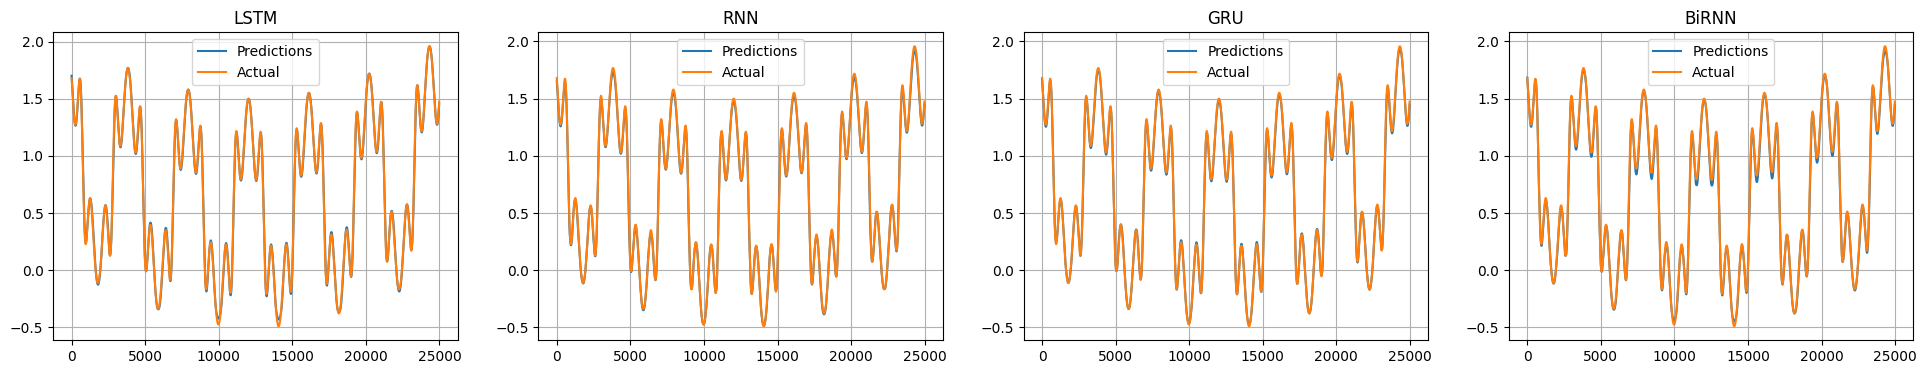

In [196]:
draw_predictions(0, len(test_results), test_results)

In [200]:
# metrics
rmse = []
rmse.append(np.sqrt(np.mean((test_results['Actual'] - test_results['Predictions (LSTM)']) ** 2)))
rmse.append(np.sqrt(np.mean((test_results['Actual'] - test_results['Predictions (RNN)']) ** 2)))
rmse.append(np.sqrt(np.mean((test_results['Actual'] - test_results['Predictions (GRU)']) ** 2)))
rmse.append(np.sqrt(np.mean((test_results['Actual'] - test_results['Predictions (BiRNN)']) ** 2)))

metrics_frame = pd.DataFrame(data={
    'Model': ['LSTM', 'RNN', 'GRU', 'BiRNN'],
    'Fit Time (seconds)': [lstm_fit_time.seconds, rnn_fit_time.seconds, gru_fit_time.seconds, birnn_fit_time.seconds],
    'Prediction Time (microseconds)': [lstm_prediction_time.microseconds, rnn_prediction_time.microseconds, gru_prediction_time.microseconds, birnn_prediction_time.microseconds],
    'RMSE': rmse
})
metrics_frame

,Model,Fit Time (seconds),Prediction Time (microseconds),RMSE
0,LSTM,90,484682,0.022677
1,RNN,60,224066,0.016215
2,GRU,92,223485,0.016579
3,BiRNN,79,177066,0.027385
